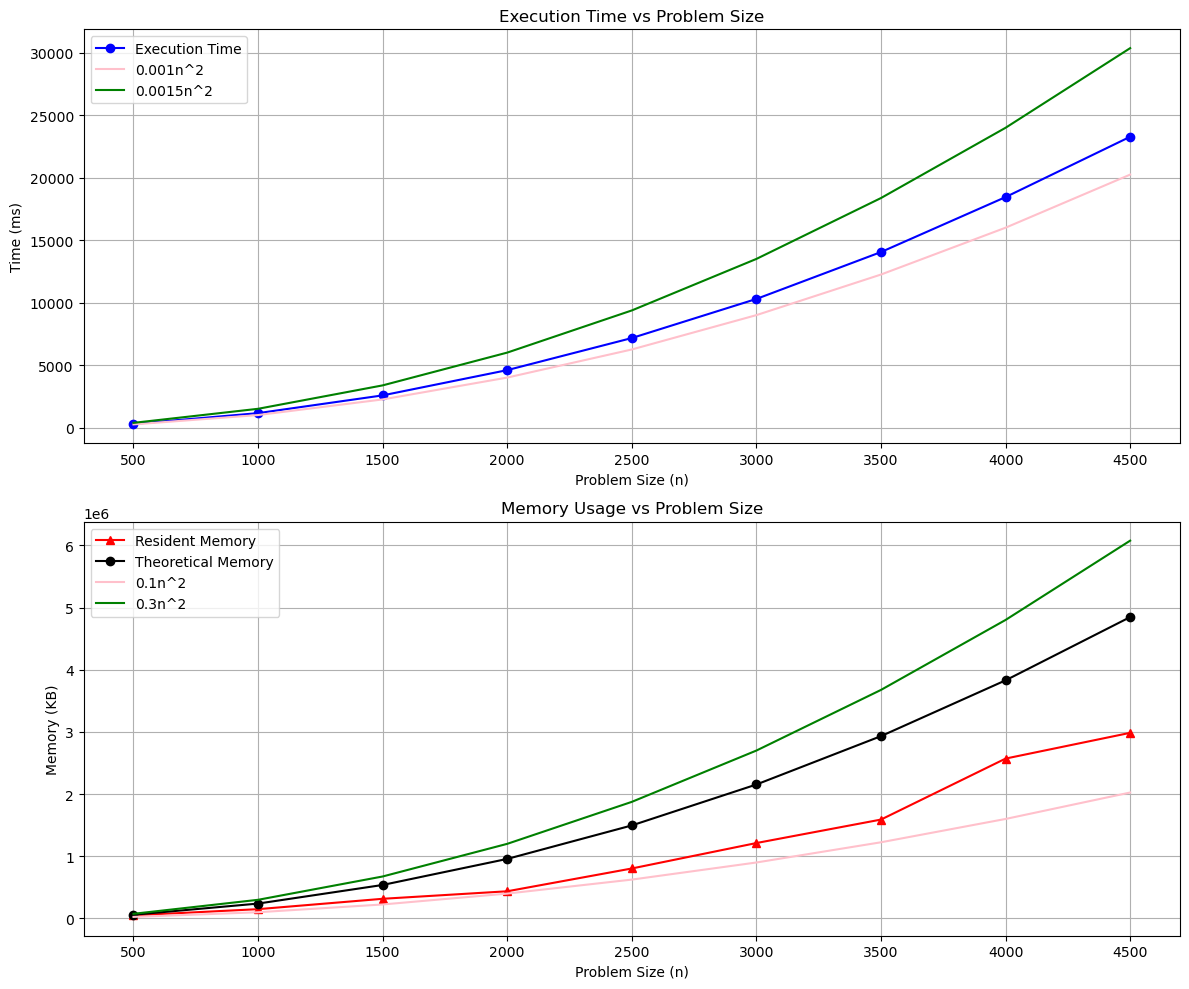

Problem Size vs Performance Statistics:
--------------------------------------------------
Largest problem size tested: 4500
Maximum execution time: 23280.90 ms
Maximum resident memory usage: 2984880.00 KB
--------------------------------------------------
Time Complexity Analysis:
Slope of log-log plot: 1.99
Estimated time complexity: O(n^1.99)
R-squared value: 1.0000
--------------------------------------------------
Space Complexity Analysis:
Slope of log-log plot: 1.88
Estimated space complexity: O(n^1.88)
R-squared value: 0.9887


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

resident_size_df = pd.read_csv('analysis_results.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot Time vs Size
ax1.plot(resident_size_df['Size'], resident_size_df['Time(ms)'], 'o-', color='blue', label='Execution Time')
ax1.plot(resident_size_df['Size'], 0.001*resident_size_df['Size']**2, '-', color='pink', label='0.001n^2')
ax1.plot(resident_size_df['Size'], 0.0015*resident_size_df['Size']**2, '-', color='green', label='0.0015n^2')
ax1.set_xlabel('Problem Size (n)')
ax1.set_ylabel('Time (ms)')
ax1.set_title('Execution Time vs Problem Size')
ax1.grid(True)
ax1.legend()

# Plot Memory vs Size
ax2.plot(resident_size_df['Size'], resident_size_df['Memory(KB)'], '^-', color='red', label='Resident Memory')
ax2.plot(resident_size_df['Size'], resident_size_df['TheoreticalMemory(KB)'], 'o-', color='black', label='Theoretical Memory')
ax2.plot(resident_size_df['Size'], 0.1*resident_size_df['Size']**2, '-', color='pink', label='0.1n^2')
ax2.plot(resident_size_df['Size'], 0.3*resident_size_df['Size']**2, '-', color='green', label='0.3n^2')
ax2.set_xlabel('Problem Size (n)')
ax2.set_ylabel('Memory (KB)')
ax2.set_title('Memory Usage vs Problem Size')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

#stats
sizes = resident_size_df['Size']
times = resident_size_df['Time(ms)']
log_sizes = np.log(sizes)
log_times = np.log(times)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_sizes, log_times)

log_memory = np.log(resident_size_df['Memory(KB)'].replace(0, 1))
mem_slope, mem_intercept, mem_r_value, mem_p_value, mem_std_err = stats.linregress(log_sizes, log_memory)

# Print some statistics
print("Problem Size vs Performance Statistics:")
print("-" * 50)
print("Largest problem size tested:", max(resident_size_df['Size']))
print("Maximum execution time:", f"{max(resident_size_df['Time(ms)']):.2f} ms")
print("Maximum resident memory usage:", f"{max(resident_size_df['Memory(KB)']):.2f} KB")
print("-" * 50)
print("Time Complexity Analysis:")
print(f"Slope of log-log plot: {slope:.2f}")
print(f"Estimated time complexity: O(n^{slope:.2f})")
print(f"R-squared value: {r_value**2:.4f}")
print("-" * 50)
print("Space Complexity Analysis:")
print(f"Slope of log-log plot: {mem_slope:.2f}")
print(f"Estimated space complexity: O(n^{mem_slope:.2f})")
print(f"R-squared value: {mem_r_value**2:.4f}")
